## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  93.212265  1256.865551  0.440912  5.348283   562.091492
1  18.370459  1375.407741  0.962892  9.038960  1324.587607
2   9.348653   878.827026  0.717445  1.447465   630.585168
3  97.633666   725.468863  0.724794  4.672841   534.659497
4  28.016622   982.325370  0.989501  7.818572   972.376947


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9880214	total: 57.3ms	remaining: 57.3s
1:	learn: 0.9734260	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9627200	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9513900	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9367737	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9253619	total: 59.7ms	remaining: 9.88s
6:	learn: 0.9119563	total: 60.2ms	remaining: 8.54s
7:	learn: 0.8988478	total: 60.6ms	remaining: 7.51s
8:	learn: 0.8858277	total: 61ms	remaining: 6.72s
9:	learn: 0.8721753	total: 61.5ms	remaining: 6.08s
10:	learn: 0.8623781	total: 61.9ms	remaining: 5.57s
11:	learn: 0.8483507	total: 62.5ms	remaining: 5.14s
12:	learn: 0.8363515	total: 63.2ms	remaining: 4.79s
13:	learn: 0.8226745	total: 63.6ms	remaining: 4.48s
14:	learn: 0.8099944	total: 64ms	remaining: 4.2s
15:	learn: 0.7999285	total: 64.4ms	remaining: 3.96s
16:	learn: 0.7894056	total: 64.9ms	remaining: 3.75s
17:	learn: 0.7801180	total: 65.4ms	remaining: 3.56s
18:	learn: 0.7725660	total: 65.7ms	remaining: 3.3

119:	learn: 0.2322570	total: 107ms	remaining: 788ms
120:	learn: 0.2300884	total: 108ms	remaining: 784ms
121:	learn: 0.2277126	total: 108ms	remaining: 779ms
122:	learn: 0.2253949	total: 109ms	remaining: 776ms
123:	learn: 0.2233640	total: 109ms	remaining: 772ms
124:	learn: 0.2206835	total: 110ms	remaining: 769ms
125:	learn: 0.2182707	total: 110ms	remaining: 765ms
126:	learn: 0.2155417	total: 111ms	remaining: 761ms
127:	learn: 0.2132076	total: 111ms	remaining: 757ms
128:	learn: 0.2109142	total: 112ms	remaining: 755ms
129:	learn: 0.2090245	total: 112ms	remaining: 751ms
130:	learn: 0.2067394	total: 113ms	remaining: 748ms
131:	learn: 0.2046075	total: 113ms	remaining: 744ms
132:	learn: 0.2023519	total: 114ms	remaining: 740ms
133:	learn: 0.2002441	total: 114ms	remaining: 737ms
134:	learn: 0.1983749	total: 115ms	remaining: 734ms
135:	learn: 0.1969674	total: 115ms	remaining: 732ms
136:	learn: 0.1952031	total: 116ms	remaining: 728ms
137:	learn: 0.1929721	total: 116ms	remaining: 725ms
138:	learn: 

296:	learn: 0.0499809	total: 186ms	remaining: 441ms
297:	learn: 0.0495410	total: 187ms	remaining: 440ms
298:	learn: 0.0492157	total: 187ms	remaining: 439ms
299:	learn: 0.0488823	total: 187ms	remaining: 437ms
300:	learn: 0.0485449	total: 188ms	remaining: 436ms
301:	learn: 0.0483224	total: 188ms	remaining: 435ms
302:	learn: 0.0479386	total: 188ms	remaining: 433ms
303:	learn: 0.0475438	total: 189ms	remaining: 432ms
304:	learn: 0.0472321	total: 189ms	remaining: 431ms
305:	learn: 0.0470176	total: 189ms	remaining: 429ms
306:	learn: 0.0466506	total: 190ms	remaining: 428ms
307:	learn: 0.0462828	total: 190ms	remaining: 427ms
308:	learn: 0.0459795	total: 190ms	remaining: 425ms
309:	learn: 0.0456991	total: 191ms	remaining: 424ms
310:	learn: 0.0454062	total: 191ms	remaining: 423ms
311:	learn: 0.0450753	total: 191ms	remaining: 422ms
312:	learn: 0.0447882	total: 191ms	remaining: 420ms
313:	learn: 0.0445995	total: 192ms	remaining: 419ms
314:	learn: 0.0442651	total: 193ms	remaining: 419ms
315:	learn: 

551:	learn: 0.0172274	total: 290ms	remaining: 235ms
552:	learn: 0.0171586	total: 290ms	remaining: 235ms
553:	learn: 0.0171183	total: 290ms	remaining: 234ms
554:	learn: 0.0170738	total: 291ms	remaining: 233ms
555:	learn: 0.0170435	total: 291ms	remaining: 233ms
556:	learn: 0.0169708	total: 292ms	remaining: 232ms
557:	learn: 0.0169518	total: 292ms	remaining: 232ms
558:	learn: 0.0169332	total: 293ms	remaining: 231ms
559:	learn: 0.0169149	total: 293ms	remaining: 230ms
560:	learn: 0.0168969	total: 294ms	remaining: 230ms
561:	learn: 0.0168484	total: 294ms	remaining: 229ms
562:	learn: 0.0167832	total: 294ms	remaining: 228ms
563:	learn: 0.0167455	total: 295ms	remaining: 228ms
564:	learn: 0.0167084	total: 295ms	remaining: 227ms
565:	learn: 0.0166910	total: 296ms	remaining: 227ms
566:	learn: 0.0166222	total: 296ms	remaining: 226ms
567:	learn: 0.0166052	total: 297ms	remaining: 226ms
568:	learn: 0.0165885	total: 297ms	remaining: 225ms
569:	learn: 0.0165422	total: 298ms	remaining: 225ms
570:	learn: 

718:	learn: 0.0097405	total: 369ms	remaining: 144ms
719:	learn: 0.0096922	total: 370ms	remaining: 144ms
720:	learn: 0.0096812	total: 370ms	remaining: 143ms
721:	learn: 0.0096410	total: 370ms	remaining: 143ms
722:	learn: 0.0096362	total: 371ms	remaining: 142ms
723:	learn: 0.0095969	total: 371ms	remaining: 142ms
724:	learn: 0.0095888	total: 372ms	remaining: 141ms
725:	learn: 0.0095503	total: 372ms	remaining: 141ms
726:	learn: 0.0095424	total: 373ms	remaining: 140ms
727:	learn: 0.0094854	total: 374ms	remaining: 140ms
728:	learn: 0.0094775	total: 374ms	remaining: 139ms
729:	learn: 0.0094370	total: 375ms	remaining: 139ms
730:	learn: 0.0094293	total: 375ms	remaining: 138ms
731:	learn: 0.0093895	total: 376ms	remaining: 137ms
732:	learn: 0.0093820	total: 376ms	remaining: 137ms
733:	learn: 0.0093746	total: 376ms	remaining: 136ms
734:	learn: 0.0093356	total: 377ms	remaining: 136ms
735:	learn: 0.0093092	total: 377ms	remaining: 135ms
736:	learn: 0.0092712	total: 377ms	remaining: 135ms
737:	learn: 

955:	learn: 0.0050900	total: 472ms	remaining: 21.7ms
956:	learn: 0.0050724	total: 473ms	remaining: 21.2ms
957:	learn: 0.0050679	total: 473ms	remaining: 20.8ms
958:	learn: 0.0050542	total: 474ms	remaining: 20.3ms
959:	learn: 0.0050369	total: 475ms	remaining: 19.8ms
960:	learn: 0.0050307	total: 475ms	remaining: 19.3ms
961:	learn: 0.0050137	total: 476ms	remaining: 18.8ms
962:	learn: 0.0050090	total: 476ms	remaining: 18.3ms
963:	learn: 0.0050021	total: 477ms	remaining: 17.8ms
964:	learn: 0.0049898	total: 477ms	remaining: 17.3ms
965:	learn: 0.0049693	total: 478ms	remaining: 16.8ms
966:	learn: 0.0049632	total: 478ms	remaining: 16.3ms
967:	learn: 0.0049407	total: 478ms	remaining: 15.8ms
968:	learn: 0.0049286	total: 479ms	remaining: 15.3ms
969:	learn: 0.0049122	total: 479ms	remaining: 14.8ms
970:	learn: 0.0049078	total: 479ms	remaining: 14.3ms
971:	learn: 0.0049045	total: 480ms	remaining: 13.8ms
972:	learn: 0.0048905	total: 480ms	remaining: 13.3ms
973:	learn: 0.0048867	total: 481ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

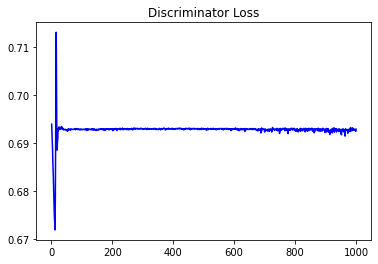

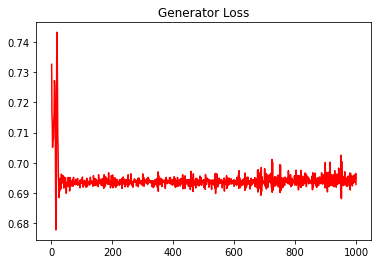

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.008538646516495486


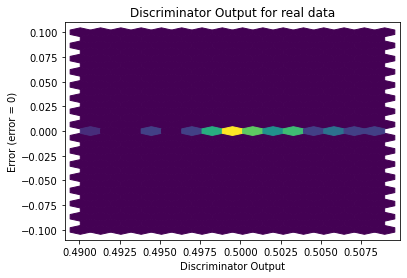

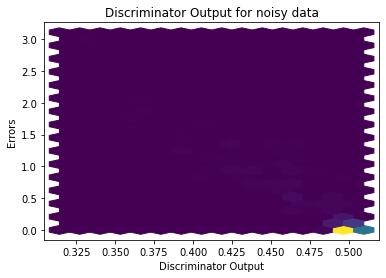

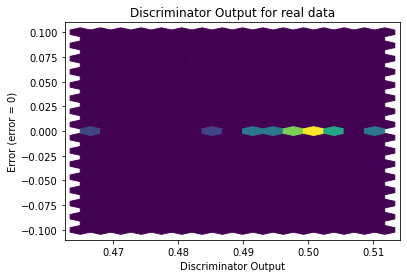

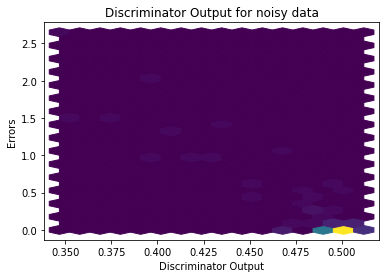

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


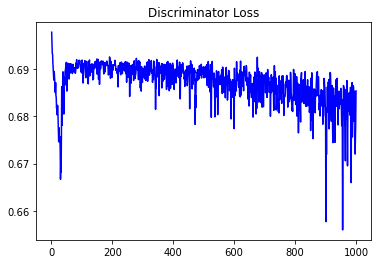

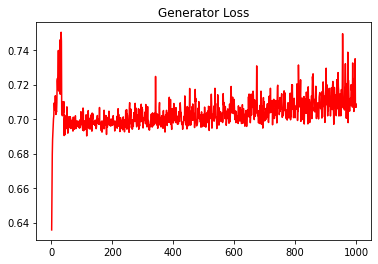

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.00903766819972352


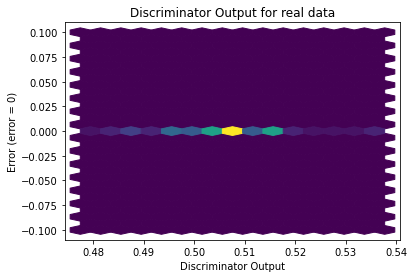

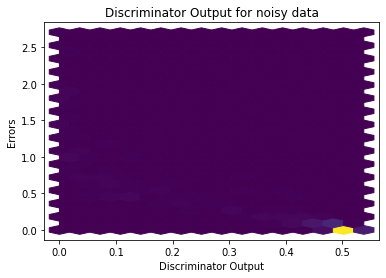

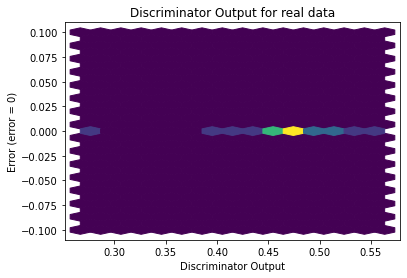

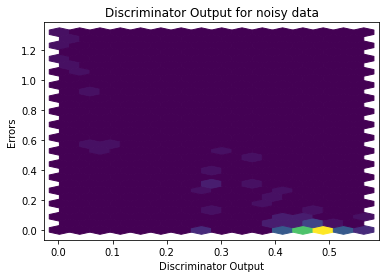

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1711]], requires_grad=True)
